# **Análisis estadístico del dataset de Netflix**
*Un dataset que muestra información detallada de todas las series y películas que están disponibles en Netflix hasta el año 2021.*

In [23]:
#Importación de librerías
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [25]:
#Cargado del dataset
df = pd.read_csv("netflix.csv")

print (df.head().to_markdown(index=False, stralign='left',numalign='right'))

| show_id   | type    | title                 | director        | cast                                                                                                                                                                                                                                                                                                            | country       | date_added         |   release_year | rating   | duration   | listed_in                                                     | description                                                                                                                                              |
|:----------|:--------|:----------------------|:----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

      type  cantidad
0    Movie      6131
1  TV Show      2676


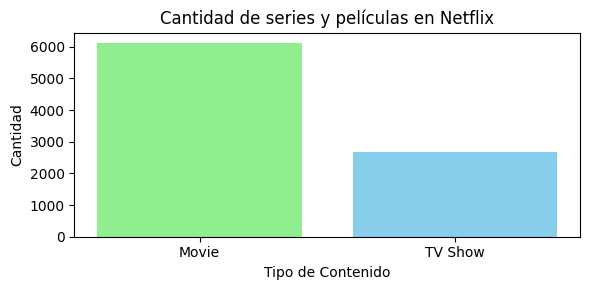

In [26]:
# Agrupar y contar la cantidad de series y películas
type_cantidad = df.groupby('type').size().reset_index(name='cantidad')
print(type_cantidad)

plt.figure(figsize=(6,3))
plt.bar(type_cantidad['type'], type_cantidad['cantidad'], color=['lightgreen','skyblue'])
plt.title('Cantidad de series y películas en Netflix')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

__*La cantidad de películas en Netflix es mayor que la cantidad de series, con una diferencia de más del doble de títulos, lo que indica que Netflix tiene una mayor oferta de películas que de series.*__

    release_year  cantidad_lanzamientos
0           1925                      1
1           1942                      2
2           1943                      3
3           1944                      3
4           1945                      4
..           ...                    ...
69          2017                   1032
70          2018                   1147
71          2019                   1030
72          2020                    953
73          2021                    592

[74 rows x 2 columns]


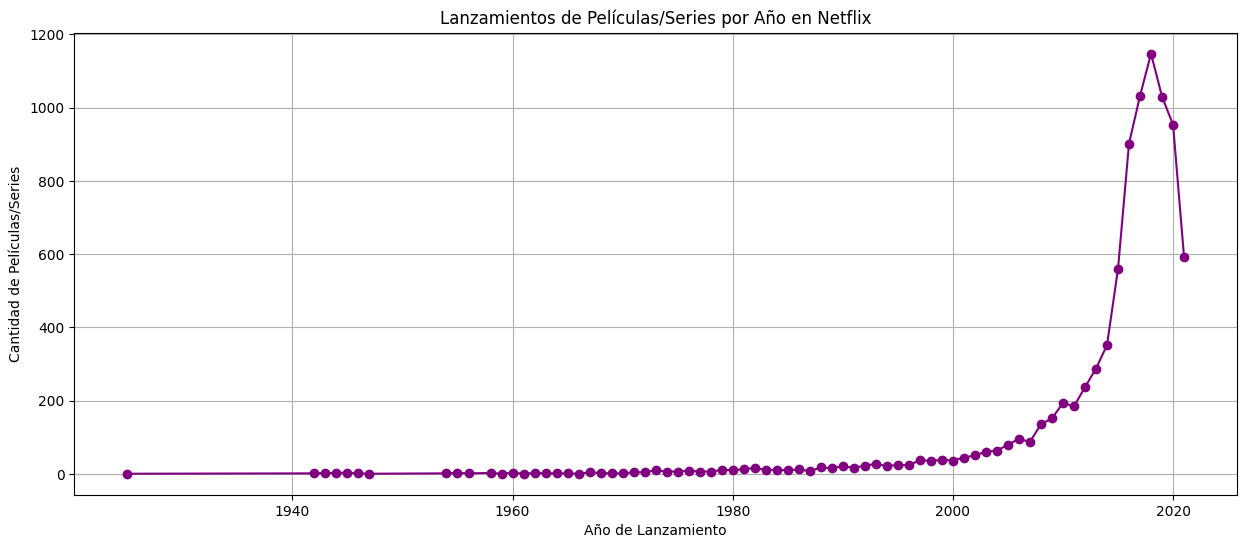

In [27]:

# Grafico1. Agrupar por año de lanzamiento y contar cuántas películas/series fueron lanzadas por año
yearly_releases = df.groupby('release_year').size().reset_index(name='cantidad_lanzamientos')
print(yearly_releases)

plt.figure(figsize=(15,6))
plt.plot(yearly_releases['release_year'], yearly_releases['cantidad_lanzamientos'], marker='o', color='purple', label='Lanzamientos por año')
plt.title('Lanzamientos de Películas/Series por Año en Netflix')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas/Series')
plt.grid(True)
plt.show()


__*Podemos notar como entre los años 2015 y 2020 hubo un aumento significativo en el lanzamiento de contenido en la plataforma.*__

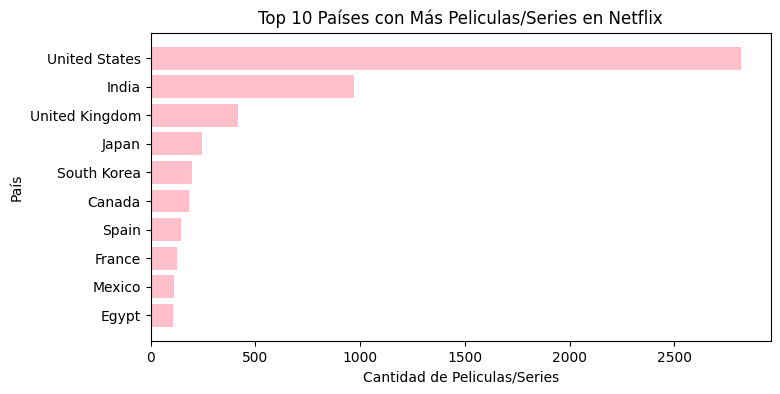

In [28]:
# Grafico 2. Cantidad de contenido por pais
agrupar_paises = df.groupby('country').size().reset_index(name='cantidad_peliculas')

top10 = agrupar_paises.sort_values(by='cantidad_peliculas', ascending=False).head(10) #Ordena de mayor a menos y organiza el top 10 paises

plt.figure(figsize=(8,4))
plt.barh(top10['country'], top10['cantidad_peliculas'], color='pink')
plt.title('Top 10 Países con Más Peliculas/Series en Netflix')
plt.xlabel('Cantidad de Peliculas/Series')
plt.ylabel('País')
plt.gca().invert_yaxis()  # invierte el listado para que el pais con mayor cantidad de contenido quede arriba
plt.show()


__*Estados Unidos es el país que cuenta con mayor cantidad de títulos en la plataforma.*__

In [30]:
#Cálculo de datos estadísticos

print("Cálculos estadísticos de los años de lanzamiento de películas y series en Netflix\n")

media = np.mean(df['release_year']) 
print(f"La media es: {media:.2f}")
mediana = np.median(df['release_year'])
print(f"La mediana es: {mediana}")
desviacion = np.std(df['release_year'])
print(f"La desviacion estandar es: {desviacion:.2f}")
moda = stats.mode(df['release_year'])
print(f"La moda  es: {moda.mode} y esta se repite {moda.count} veces")
varianza = np.var(df['release_year'])
print(f"La varianza  es: {varianza:.2f}")

Cálculos estadísticos de los años de lanzamiento de películas y series en Netflix

La media es: 2014.18
El promedio es: 2014.18
La mediana es: 2017.0
La desviacion estandar es: 8.82
La moda  es: 2018 y esta se repite 1147 veces
La varianza  es: 77.77


## **Análisis:**

Por medio de la exploración de los datos, pudimos identificar algunas tendencias y datos interesantes sobre el dataset de Netflix:

### **Diferencia entre la cantidad de series y películas**
Sabemos que Netflix es una plataforma con gran cantidad de contenido. Por medio de un gráfico, pudimos ver que Netflix tiene una mayor cantidad de películas que de seriess, con una diferencia de más del doble de títulos, siendo la cantidad de películas 6131 y la de series 2676, lo que indica que Netflix tiene una mayor oferta de películas que de series, probablemente porque han notado esa preferencia de los usuarios.

### **Lanzamientos por año**
Entre los años 2015 y 2020, Netflix experimentó un crecimiento significativo en el lanzamiento de películas y series, probablemente debido a la mayor producción de estos, expansión global de la plataforma y la popularidad creciente de los servicios de streaming. No solo la adición de contenido externo sino también la creación del contenido propio y orginal hizo que el número de títulos añadidos anualmente casi se duplicara en este período.

### **Top países productores de contenido**
Estados Unidos siendo el país con mayor cantidad de producciones en la plataforma puede demostrar la centralización de Netflix en el mercado estadounidense, siendo este probablemente el principal destino de la plataforma en sus comienzos. Sin embargo, aunque Estados Unidos sigue siendo el mayor productor de contenido, países como India y Corea del Sur han crecido en popularidad, con una cantidad considerable de películas y series, lo que refleja la estrategia de Netflix de captar audiencias internacionales mediante producciones locales, y así crecer más su plataforma.

## **Datos estadísticos de los años de lanzamiento de películas y series en Netflix**
Teniendo en cuenta el año de lanzamiento de los títulos, podemos hacer un análisis de los datos estadísticos:

### **Media: 2014.18**

La media del año de lanzamiento es aproximadamente 2014. Esto indica que, en general, la mayoría de las películas y series en el dataset se lanzaron alrededor de este año. Es posible entonces que Netflix comenzara a producir más contenido original alrededor de 2014.

### **Mediana: 2017**

La mediana es 2017, lo que implica que la mitad de los lanzamientos son anteriores a ese año y la otra mitad, posteriores. Dado que la mediana es más alta que la media, esto sugiere que hubo un número considerable de lanzamientos en años recientes, lo que está elevando la media.

### **Desviación Estándar: 8.82**

La desviación estándar de 8.82 muestra que los años de lanzamiento varían considerablemente, pero no demasiado. Esto significa que, aunque muchos lanzamientos son de años cercanos a 2014, hay también algunos de años más lejanos.

### **Moda: 2018 (1147 veces)**

La moda es 2018, lo que significa que ese año tuvo el mayor número de lanzamientos, con 1147 películas y series. Esto sugiere que Netflix se centró en ampliar su catálogo en ese año, probablemente en un esfuerzo por fortalecer su posición en el mercado.

### **Varianza: 77.77**

La varianza, que mide la dispersión de los datos, es también relativamente baja. Esto significa que los lanzamientos no están muy alejados de la media.
